## Agenda
   
    \ Problem Description
    ♦ Data Understanding and exploration
    ♦ Split the data into Train and Validation sets
    ♦ Model Building
       - Logistic Regression
       - ROC curve to fix the threshold values
    ♦ Construct a confusion matrix
    ♦ Evaluation of the error metrics
    ♦ How do we implement Regularization techniques
    ♦ Build model using Naive Bayes classifier
    ♦ Compute Evaluation metrics
    ♦ Prinicpal Component Analysis
    

## Problem Description

A Regional Bank XYZ with 40000+ Customers would like to expand its business by predicting Customer's behavior to better sell cross products (eg: Selling Term Deposits to Retail Customers). The Bank has approached us to assess the same by providing access to their Customer campaign data. 

The data is related with direct marketing campaigns. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Predict if an existing customer would subscribe to a Term Deposit

#### Attribute information:



Input variables:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                   "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no") 

##### Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

11 - duration: last contact duration, in seconds (numeric)

##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: "yes","no")

 

In [65]:
import pandas as pd 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
     

### Loading the data

In [66]:
df=pd.read_csv("Bank_Data.csv")

### Understanding the data

In [67]:
df.shape

(4521, 16)

In [68]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [69]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [70]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,apr,345,2,249,7,other,no


### Summary statistics

In [71]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [74]:
df.describe(include=['O']).T

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
contact,4521,3,cellular,2896
month,4521,12,may,1398
poutcome,4521,4,unknown,3705
y,4521,2,no,4000


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [9]:
df.y.value_counts(normalize=True) # frequency for each level within the target variable

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [10]:
df.y.value_counts() # frequency for each level

no     4000
yes     521
Name: y, dtype: int64

In [11]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
' Barath    '.strip()

'Barath'

### Recode the levels of target on  data ; yes=1 and no=0


In [14]:
df['y'] = df['y'].apply(lambda x: 0 if x.strip()=='no' else 1)


In [76]:
df["y"]

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [87]:
df["y"]=df['y'].map({'Yes':1,'no':0})

In [88]:
df['y']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4516    0.0
4517    0.0
4518    0.0
4519    0.0
4520    0.0
Name: y, Length: 4521, dtype: float64

In [77]:
df['education']

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
          ...    
4516    secondary
4517     tertiary
4518    secondary
4519    secondary
4520     tertiary
Name: education, Length: 4521, dtype: object

In [78]:

#function for crosstabs
def cross_tab(x,y):
    crtab = pd.crosstab(df[x], df[y])
    return crtab

In [85]:
cross_tab("education" ,"y")

y,no,yes
education,,
primary,614,64
secondary,2061,245
tertiary,1157,193
unknown,168,19


In [94]:
cat_attr=df.select_dtypes(include ='object').columns 

#df[cat_attr]= df[cat_attr].astype('category')

In [95]:
cat_attr


Index([], dtype='object')

In [97]:
#df["cat_attr"]

In [17]:
data = pd.get_dummies(columns=cat_attr, data = df, prefix=cat_attr, prefix_sep="_", drop_first=True)
data.head()

,age,balance,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [19]:
data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### Splitting the data into train and Validation sets

In [20]:
X = data.loc[:,data.columns.difference(['y'])] # taking all the independent columns
y = data.y # separting the target variable

In [21]:
X.head()

,age,balance,campaign,contact_telephone,contact_unknown,default_yes,duration,education_secondary,education_tertiary,education_unknown,...,month_mar,month_may,month_nov,month_oct,month_sep,pdays,poutcome_other,poutcome_success,poutcome_unknown,previous
0,30,1787,1,0,0,0,79,0,0,0,...,0,0,0,1,0,-1,0,0,1,0
1,33,4789,1,0,0,0,220,1,0,0,...,0,1,0,0,0,339,0,0,0,4
2,35,1350,1,0,0,0,185,0,1,0,...,0,0,0,0,0,330,0,0,0,1
3,30,1476,4,0,1,0,199,0,1,0,...,0,0,0,0,0,-1,0,0,1,0
4,59,0,1,0,1,0,226,1,0,0,...,0,1,0,0,0,-1,0,0,1,0


In [22]:
y[:6]

0    0
1    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64

In [23]:
data['y'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: y, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=2323)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=124)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 41)
(1357, 41)
(3164,)
(1357,)


In [28]:
print('train - Stratification',y_train.value_counts())
print('test - Stratification',y_test.value_counts())

train - Stratification 0    2799
1     365
Name: y, dtype: int64
test - Stratification 0    1201
1     156
Name: y, dtype: int64


In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=124)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2323)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3164, 41)
(1357, 41)
(3164,)
(1357,)


In [31]:
print('train - rand',y_train.value_counts())
print('test - rand',y_test.value_counts())

train - rand 0    2782
1     382
Name: y, dtype: int64
test - rand 0    1218
1     139
Name: y, dtype: int64


### Standardizing the numeric attributes in the train and test data

In [26]:
scaler = MinMaxScaler()
X_train[['age','balance','duration','pdays','previous','campaign']] = scaler.fit_transform(X_train[['age','balance','duration','pdays','previous','campaign']])
X_test[['age','balance','duration','pdays','previous','campaign']]=scaler.transform(X_test[['age','balance','duration','pdays','previous','campaign']])

In [27]:
#import statsmodels.api as sm


In [28]:
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

### Model Building

In [32]:
X_train.columns

Index(['age', 'balance', 'campaign', 'contact_telephone', 'contact_unknown',
       'default_yes', 'duration', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_yes', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'loan_yes', 'marital_married',
       'marital_single', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'pdays', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'previous'],
      dtype='object')

In [33]:
# logit_model=sm.Logit(y_train,X_train)
# result=logit_model.fit()
# print(result.summary2())

In [34]:
# X_train[['age','const']][:5]

In [34]:
# train_preds = result.predict(X_train[['age','const']])
# # train_preds_prob=result.predict_proba(X_train[['age','const']])[,1]
# #test_preds = result.predict(X_test[['age','const']])
# #test_preds_prob=result.predict_proba(X_test[['age','const']])[:,1]

In [35]:
#train_preds[:5]

### Logistic Regression

In [41]:
# logistic_model = LogisticRegression(penalty='none')

# logistic_model.fit(X_train,y_train)

### Generating predictions

In [ ]:
# train_preds = logistic_model.predict(X_train)
# train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
# test_preds = logistic_model.predict(X_test)
# test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [ ]:
# train_preds[:5]

In [ ]:
# train_preds_prob[:5]

In [ ]:
# logistic_model.coef_

### Confusion Matrix

In [38]:
# confusion_matrix(y_train,train_preds)

In [ ]:
# train_accuracy_1= accuracy_score(y_train,train_preds)
# train_recall_1= recall_score(y_train,train_preds)
# train_precision_1= precision_score(y_train,train_preds)

# test_accuracy_1= accuracy_score(y_test,test_preds)
# test_recall_1= recall_score(y_test,test_preds)
# test_precision_1= precision_score(y_test,test_preds)

In [ ]:
# print(train_accuracy_1)
# print(train_recall_1)
# print(train_precision_1)

# print(test_accuracy_1)
# print(test_recall_1)
# print(test_precision_1)

In [ ]:
# #Classification report
# print(classification_report(y_train,train_preds))

In [ ]:
# print(classification_report(y_test,test_preds))

<IPython.core.display.Javascript object>


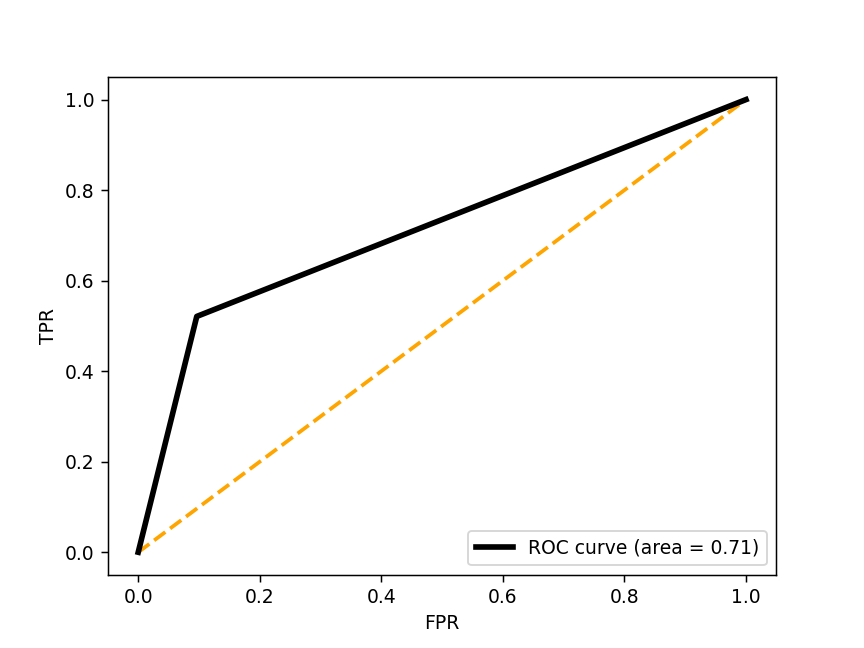

In [100]:
%matplotlib notebook
# plt.figure()
plt.plot([0,1],[0,1],color="orange" ,lw=2, linestyle='--')
plt.plot(fpr,tpr,color='black', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

### Manual inspection of threshold value

In [ ]:
# roc_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})

# roc_df

In [ ]:
# roc_df.sort_values('TPR',ascending=False,inplace=True)


In [ ]:
# optimal_idx = np.argmax(tpr - fpr)
# optimal_threshold = threshold[optimal_idx]

In [ ]:
# optimal_threshold

In [ ]:
# custom_threshold = 0.099


# ## To get in 0-1 format vector (pandas Series)
# final_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in train_preds_prob])
# final_pred_array.value_counts()

# final_test_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in test_preds_prob])
# final_test_pred_array.value_counts()

In [ ]:
# ## To get True-False format vector (pandas Series)
# final_pred = pd.Series(train_preds_prob > 0.099)
# final_pred.value_counts()
# final_test_pred=pd.Series(test_preds_prob > 0.099)

In [ ]:
# print(classification_report(y_train,final_pred))

In [ ]:
# print(classification_report(y_test,final_test_pred))

In [ ]:
# train_accuracy= accuracy_score(y_train,final_pred)
# train_recall= recall_score(y_train,final_pred)
# print(train_accuracy)
# print(train_recall)

# # test_accuracy= accuracy_score(y_test,final_test_pred)
# test_recall= recall_score(y_test,final_test_pred)
# print(test_accuracy)
# print(test_recall)

### Logistic model 2 -   Using Penalty as 'L1'

In [ ]:
# l1_model = LogisticRegression(penalty='l1', solver='saga')

# l1_model.fit(X_train,y_train)

# l1_train_pred = l1_model.predict(X_train)
# l1_test_pred = l1_model.predict(X_test)

#### Confusion Matrix for model2

In [ ]:
# confusion_matrix(y_train,l1_train_pred)

In [ ]:
# train_pred_prob = l1_model.predict_proba(X_train)[:,1]
# train_pred_classes=l1_model.predict(X_train)
# print(train_pred_classes)

# test_pred_classes=l1_model.predict(X_test)
# test_pred_prob=l1_model.predict_proba(X_train)[:,1]

In [ ]:
# l1_model.coef_

In [ ]:
# train_accuracy_2 = accuracy_score(y_train,train_pred_classes)
# train_recall_2 = recall_score(y_train,train_pred_classes)
# train_precision_2 = precision_score(y_train,train_pred_classes)

# test_accuracy_2= accuracy_score(y_test,test_pred_classes)
# test_recall_2= recall_score(y_test,test_pred_classes)
# test_precision_2= precision_score(y_test,test_pred_classes)

In [ ]:
# print(train_accuracy_2)
# print(train_recall_2)
# print(train_precision_2)

# print(test_accuracy_2)
# print(test_recall_2)
# print(test_precision_2)

### Model using penalty 'L2'

In [ ]:
# l2_model = LogisticRegression(penalty='l2')

# l2_model.fit(X_train,y_train)

# l2_train_pred = l2_model.predict(X_train)
# l2_test_pred = l2_model.predict(X_test)

In [ ]:
# confusion_matrix(y_train,l2_train_pred)

In [ ]:
# train_l2 = l2_model.predict_proba(X_train)[:,1]
# train_l2c=l2_model.predict(X_train)
# print(train_l2c)

# test_l2c=l2_model.predict(X_test)
# test_l2=l2_model.predict_proba(X_train)[:,1]

In [ ]:
# l2_model.coef_

In [ ]:
# train_accuracy_3 = accuracy_score(y_train,train_l2c)
# train_recall_3 = recall_score(y_train,train_l2c)
# train_precision_3 = precision_score(y_train,train_l2c)

# test_accuracy_3= accuracy_score(y_test,test_l2c)
# test_recall_3= recall_score(y_test,test_l2c)
# test_precision_3= precision_score(y_test,test_l2c)

In [ ]:
# print(train_accuracy_3)
# print(train_recall_3)
# print(train_precision_3)

# print(test_accuracy_3)
# print(test_recall_3)
# print(test_precision_3)

### Using penalty 'elasticnet'

In [ ]:
# reg_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

# reg_model.fit(X_train,y_train)

# train_pred = reg_model.predict(X_train)
# test_pred = reg_model.predict(X_test)

In [ ]:
# reg_model.coef_

### Naive Bayes Classifier

In [53]:
model = GaussianNB().fit(X_train,y_train) 

pred_train = model.predict(X_train)  
pred_test = model.predict(X_test) #predict on test data 

print('train acuuracy is :',accuracy_score(y_train,pred_train)) 
print('train Recall:',recall_score(y_train,pred_train)) 
print('train acuuracy is:',accuracy_score(y_test,pred_test))
print('train Recall:',recall_score(y_test,pred_test))

train acuuracy is : 0.8574589127686473
train Recall: 0.5209424083769634
train acuuracy is: 0.8518791451731761
train Recall: 0.48201438848920863


In [55]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [50]:
confusion_matrix(y_train,pred_train)
confusion_matrix(y_test,pred_test)

array([[1089,  129],
       [  72,   67]], dtype=int64)

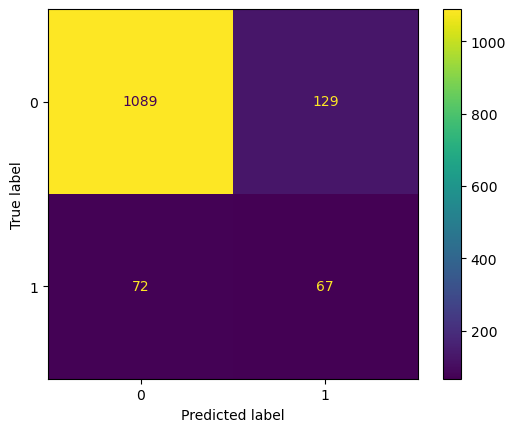

In [60]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()


In [62]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2782
           1       0.43      0.52      0.47       382

    accuracy                           0.86      3164
   macro avg       0.68      0.71      0.69      3164
weighted avg       0.87      0.86      0.86      3164



In [63]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1218
           1       0.34      0.48      0.40       139

    accuracy                           0.85      1357
   macro avg       0.64      0.69      0.66      1357
weighted avg       0.88      0.85      0.86      1357



### ROC and AUC

In [103]:
fpr, tpr, threshold = roc_curve(y_test,pred_test)
roc_auc = auc(fpr, tpr)

In [107]:
threshold

array([2, 1, 0], dtype=int64)

In [108]:
roc_curve(y_test,pred_test)

(array([0.        , 0.10591133, 1.        ]),
 array([0.        , 0.48201439, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [106]:
tpr

array([0.        , 0.48201439, 1.        ])

In [105]:
fpr

array([0.        , 0.10591133, 1.        ])

<IPython.core.display.Javascript object>


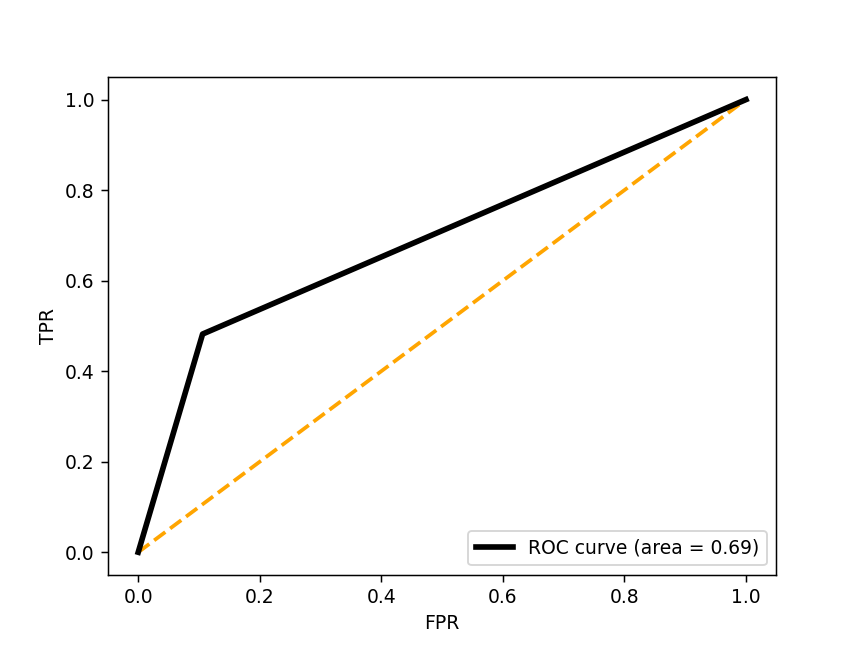

In [104]:
%matplotlib notebook
# plt.figure()
plt.plot([0,1],[0,1],color="orange" ,lw=2, linestyle='--')
plt.plot(fpr,tpr,color='black', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

### Balancing the class weights

In [ ]:
# logistic_model = LogisticRegression(penalty='none', class_weight='balanced')

# logistic_model.fit(X_train,y_train)

In [ ]:
# train_preds = logistic_model.predict(X_train)
# train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
# test_preds = logistic_model.predict(X_test)
# test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [ ]:
# logistic_model.coef_

In [ ]:
# confusion_matrix(y_train,train_preds)

In [ ]:
# train_accuracy_1= accuracy_score(y_train,train_preds)
# train_recall_1= recall_score(y_train,train_preds)
# train_precision_1= precision_score(y_train,train_preds)

# test_accuracy_1= accuracy_score(y_test,test_preds)
# test_recall_1= recall_score(y_test,test_preds)
# test_precision_1= precision_score(y_test,test_preds)

In [ ]:
# print(train_accuracy_1)
# print(train_recall_1)
# print(train_precision_1)

# print(test_accuracy_1)
# print(test_recall_1)
# print(test_precision_1)

In [ ]:
print(classification_report(y_train,train_preds))

In [ ]:
print(classification_report(y_test,test_preds))